# Utilizando SVM!

Como pudimos ver en la teoría el algoritmo de svm es un algoritmo muy interesante que nos permite clasificar diferentes clases de manera intuitiva y rápida. 

Para el desafío de hoy, vamos a utilizar un dataset de calidad de vinos para ver si podemos utilizar todo lo que aprendimos !

Las columnas que contiene el dataset son las siguientes:

1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable
12 - quality (rango entre 0 and 10)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
#Imprimimos la forma del dataset
    
print("N Filas y columnas ", df.shape )

N Filas y columnas  (1143, 13)


In [5]:
#Chequeo de dtypes de todas las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#buscamos valores nulos 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Dropeamos la columna Id que no nos interesa

In [7]:
df.drop(['Id'], axis=1, inplace=True)

In [8]:
df.describe().round(2) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


Veamos los valores que puede tomar la variable target quality

In [9]:
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [10]:
# Agrupemos por quality y grafiquemos esto en un histograma
q_gb = df.groupby('quality').mean()
q_gb

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='quality'>

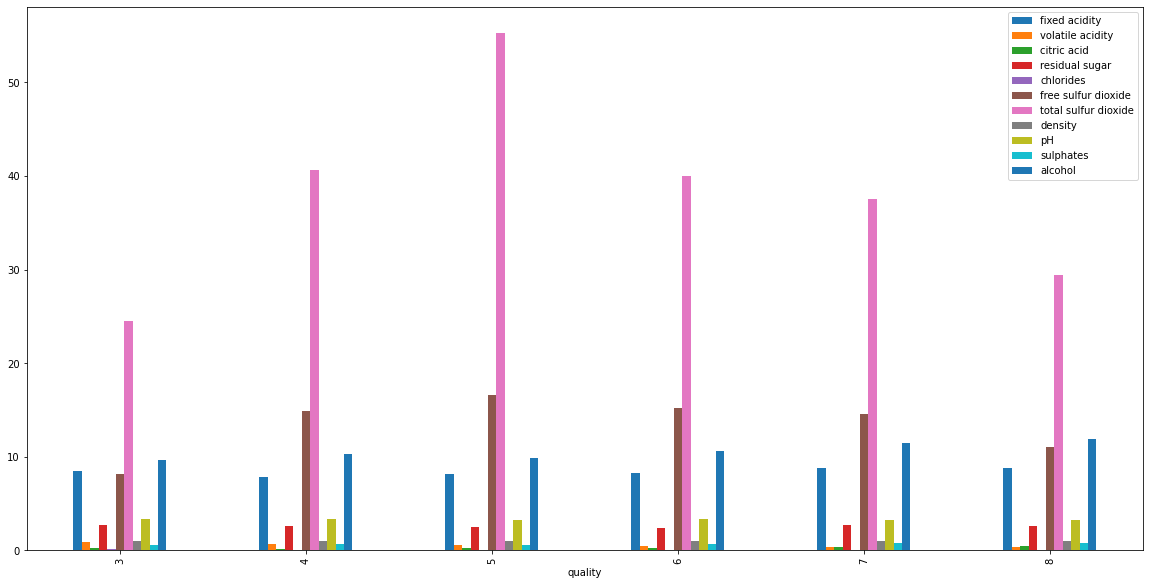

In [12]:
q_gb.plot(kind="bar",figsize=(20,10))

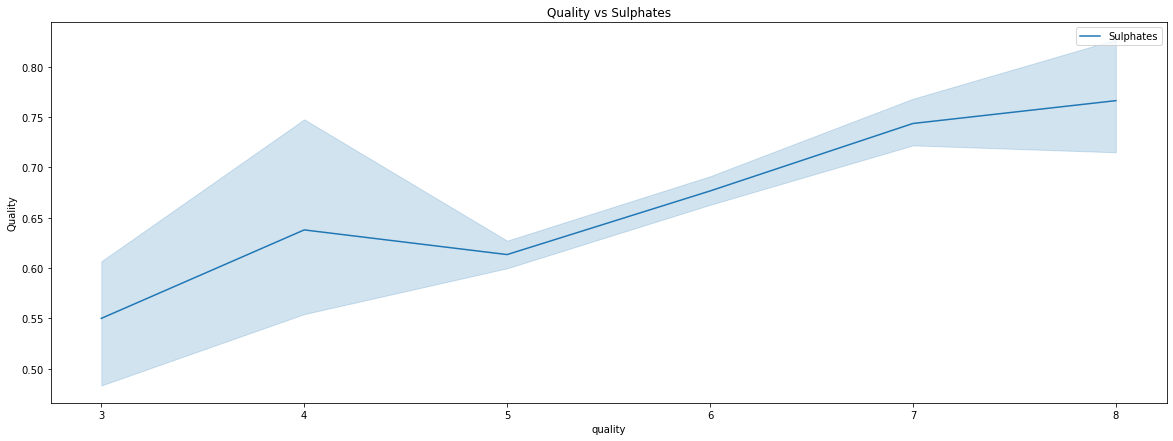

In [13]:
# Hagamos algunos plots para ver como se comporta la variable quality respecto a las demas variables
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quality")
plt.title("Quality vs Sulphates")
plt.legend()
plt.show()



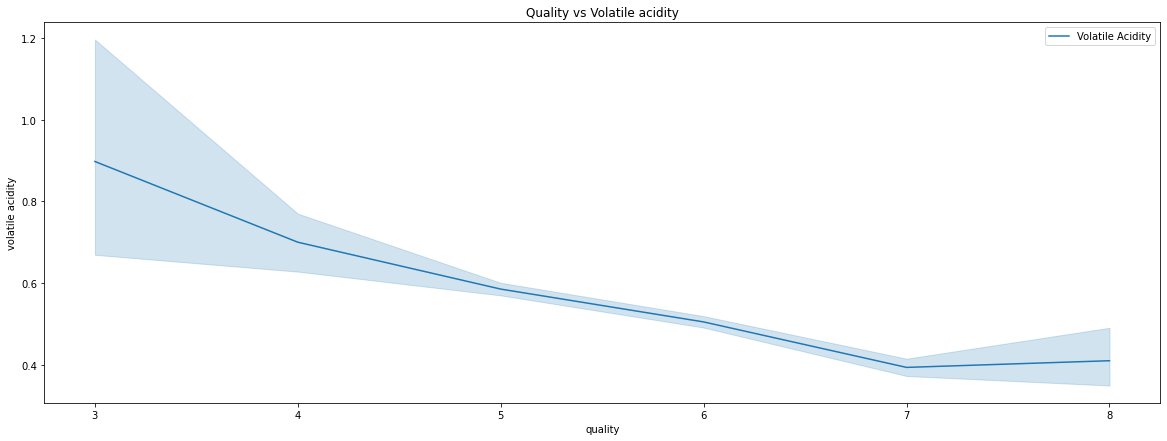

In [14]:
# Hagamos algunos plots para ver como se comporta la variable quality respecto a las demas variables
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
plt.ylabel("volatile acidity")
plt.title("Quality vs Volatile acidity")
plt.legend()
plt.show()

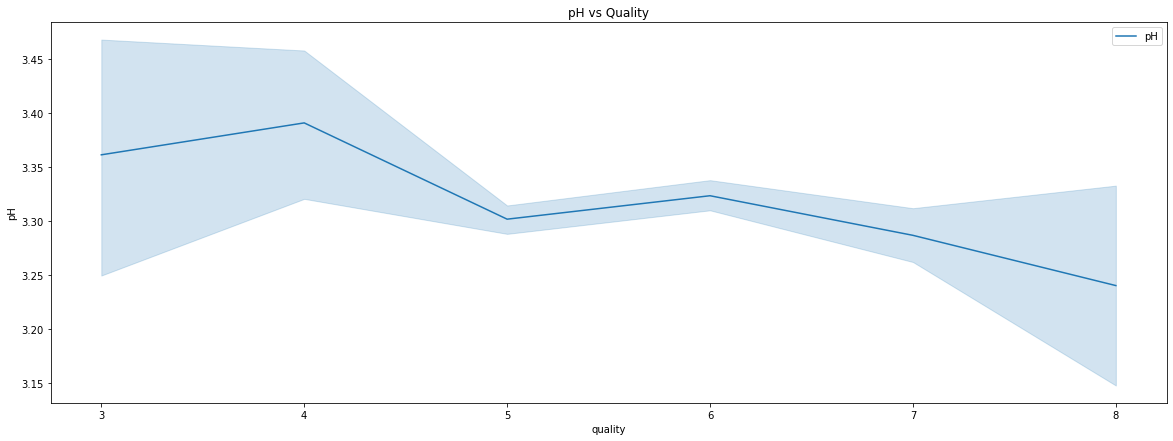

In [15]:
# Hagamos algunos plots para ver como se comporta la variable quality respecto a las demas variables
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="pH",label="pH")
plt.ylabel("pH")
plt.title("pH vs Quality")
plt.legend()
plt.show()

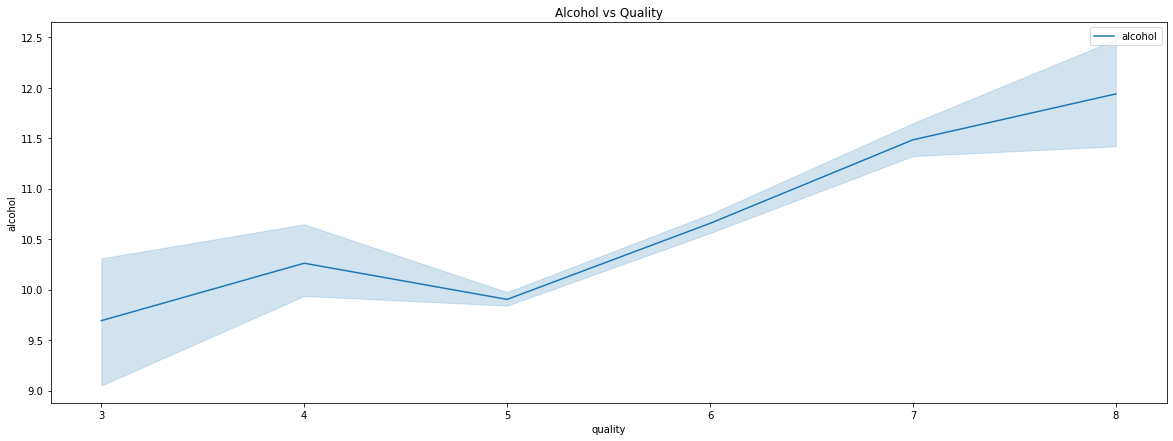

In [16]:
# Hagamos algunos plots para ver como se comporta la variable quality respecto a las demas variables
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="alcohol",label="alcohol")
plt.ylabel("alcohol")
plt.title("Alcohol vs Quality")
plt.legend()
plt.show()


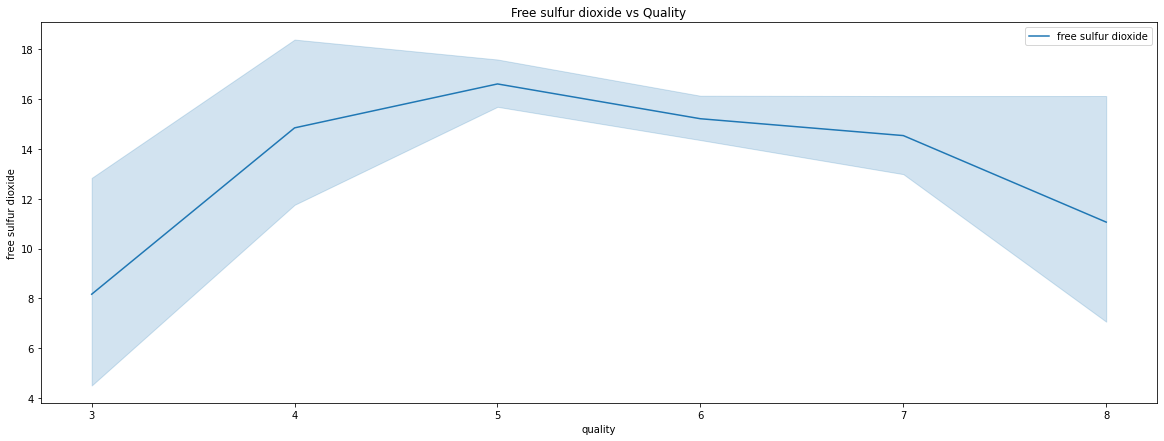

In [17]:
# Hagamos algunos plots para ver como se comporta la variable quality respecto a las demas variables
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",label="free sulfur dioxide")
plt.ylabel("free sulfur dioxide")
plt.title("Free sulfur dioxide vs Quality")
plt.legend()
plt.show()

Al pasar todo el conjunto de datos, se agregará sobre los valores repetidos para mostrar la media y el intervalo de confianza del 95%

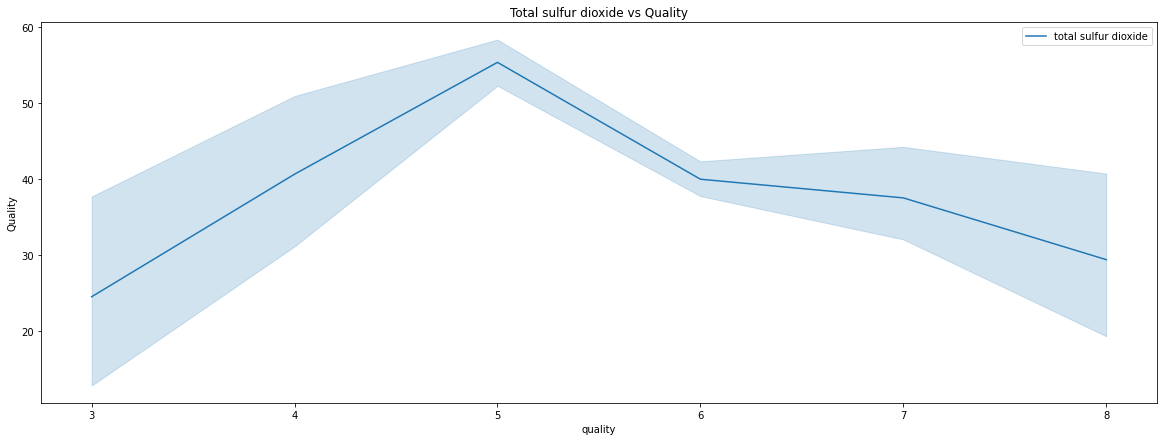

In [18]:
# Hagamos algunos plots para ver como se comporta la variable quality respecto a las demas variables
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y=,label="total sulfur dioxide")
plt.ylabel("Quality")
plt.title("Total sulfur dioxide vs Quality") 
plt.legend()
plt.show()	

Qué cosa interesante podemos notar en los dos últimos plots ??

## Entrenando el modelo con SVM

In [19]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [84]:
#Definir el valor X y el valor y , y dividir los datos en entrenamiento y testeo
X = df.drop(columns="quality")           
y = df["quality"]    

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


In [86]:
svm_model = LinearSVC(random_state=23, tol=1e-5,max_iter=3000)

In [87]:
# fit model
svm_model.fit(X_train,y_train)

c:\Users\ThoT\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=3000, random_state=23, tol=1e-05)

Uh que paso ?? Sera que nos olvidamos algo importante ? Si hay que estandarizar los datos!

Utilicemos StandarScaler de Sklearn para estandarizar las características eliminando la media y escalando a la varianza unitaria.

In [88]:
scaler = StandardScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test)

In [89]:
# fit model
svm_model.fit(X_train_scaled,y_train)

c:\Users\ThoT\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=3000, random_state=23, tol=1e-05)

In [90]:
print("Score the X-train with Y-train is : ", svm_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svm_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.29638273045507585
Score the X-test  with Y-test  is :  0.3006993006993007


Vemos que el ajuste no es bueno y que el modelo no converge, qué es lo que está pasando ? Sera que nuestras clases no se pueden separar de manera lineal ? Nos faltara hacer algo mas ? Hagamos un plot para ver como se separan las clases.

<AxesSubplot:xlabel='pH', ylabel='alcohol'>

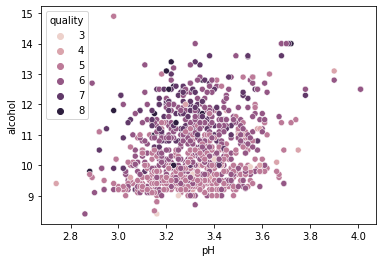

In [31]:
sns.scatterplot(data=df, x="pH", y="alcohol", hue="quality")  

<AxesSubplot:xlabel='sulphates', ylabel='alcohol'>

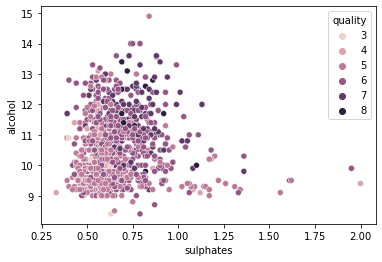

In [32]:
sns.scatterplot(data=df, x="sulphates", y="alcohol", hue="quality")  

Claramente no es facil poder plotear en tantas dimensiones para poder distingir las clases. Para realizar esto debemos utilizar algún método de reducción de la dimensionalidad, por ejemplo PCA. Se animan a tratar de hacerlo?? . Este metodo lo veremos mas adelante en las teorías.

In [92]:
# Usando el modelo SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation SVC : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.6102683780630105
Score the X-test  with Y-test  is :  0.5594405594405595
 Model Evaluation SVC : accuracy score  0.5594405594405595


In [91]:
# Usando el modelo SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train_scaled,y_train)

y_pred_svc =svc_model.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", svc_model.score(X_train_scaled,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test_scaled,y_test))
print(" Model Evaluation SVC : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.912485414235706
Score the X-test  with Y-test  is :  0.5909090909090909
 Model Evaluation SVC : accuracy score  0.5909090909090909


* Hay algo muy importante que nos falto realizar que es ????

<AxesSubplot:>

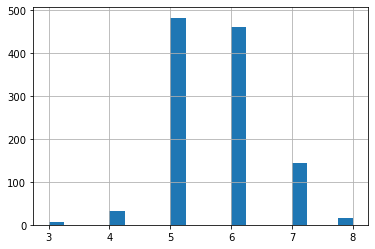

In [67]:
df['quality'].hist(bins=20)

Las clases estan super desbalanceadas!! Primero podemos utilizar stratify para mejorar nuestra diferencia entre train y test. Esto nos permite que nuestras clases en el split tengan la misma proporcion. 

In [93]:
X = df.drop(columns="quality")           
y = df["quality"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23,stratify=y)

# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.fit_transform(X_test)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


In [94]:
# Usando el modelo SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train_scaled,y_train)

y_pred_svc =svc_model.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", svc_model.score(X_train_scaled,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test_scaled,y_test))
print(" Model Evaluation SVC : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.9229871645274212
Score the X-test  with Y-test  is :  0.583916083916084
 Model Evaluation SVC : accuracy score  0.583916083916084


<AxesSubplot:>

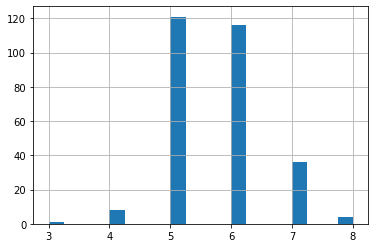

In [71]:
y_test.hist(bins=20)

Tarea : Se les ocurre  como balancear las clases ??

Tratemos de aplicar otro de los algoritmos vistos en la clase Regresión Logística.

### Regresión Logística

In [95]:
# Usando el modelo LogisticRegression
clf = LogisticRegression(random_state=23).fit(X_train_scaled, y_train)

y_pred_clf =clf.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", clf.score(X_train_scaled,y_train))
print("Score the X-test  with Y-test  is : ", clf.score(X_test_scaled,y_test))
print(" Model Evaluation SVC : accuracy score " , accuracy_score(y_test,y_pred_clf))

Score the X-train with Y-train is :  0.6149358226371062
Score the X-test  with Y-test  is :  0.5979020979020979
 Model Evaluation SVC : accuracy score  0.5979020979020979


Tenemos una performance muy similar, como podemos mejorar esto ?